## Histograms <br>
Histograms capture the frequency distributions of a set of data.<br>
represents the distribution of pixel intensities ( whether color or gray-scale )in an image. <br>
<br>
cv2.calcHist( images, channels, mask, histsize, ranges ) <br>


In [1]:
import numpy as np
import imutils
import cv2

import matplotlib.pyplot as plt
%matplotlib inline

(0, 256)

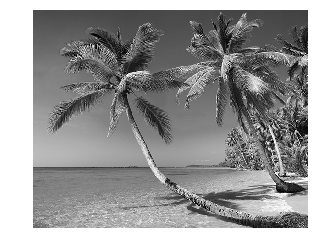

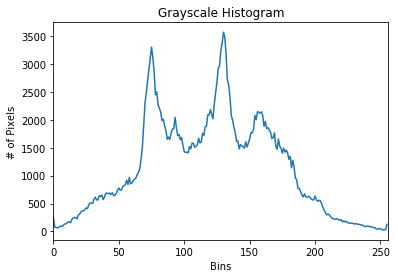

In [2]:
file = './data/beach.png'
image = cv2.imread(file)
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# construct a grayscale histogram
hist = cv2.calcHist([image], [0], None, [256], [0, 256])

# matplotlib expects RGB images so convert and then display the image
# with matplotlib to avoid GUI conflicts/errors (mainly on macOS)
plt.figure()
plt.axis("off")
plt.imshow(cv2.cvtColor(image, cv2.COLOR_GRAY2RGB))

# plot the histogram
plt.figure()
plt.title("Grayscale Histogram")
plt.xlabel("Bins")
plt.ylabel("# of Pixels")
plt.plot(hist)
plt.xlim([0, 256])

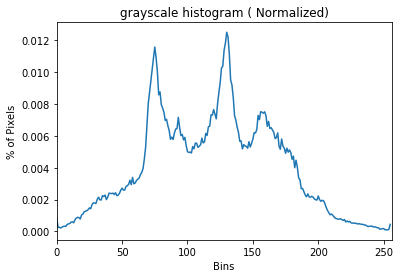

In [15]:
#normalize the histogram
hist /= hist.sum()

#plt the norm histogram
plt.figure()
plt.title("grayscale histogram ( Normalized)")
plt.xlabel("Bins")
plt.ylabel("% of Pixels")
plt.plot(hist)
plt.xlim([0,256])
plt.show()

## Color histogram

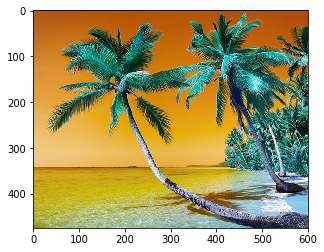

In [22]:
image = cv2.imread(file) 
plt.imshow(image)

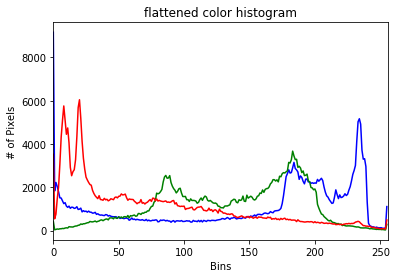

In [23]:
# grab the channels
chans = cv2.split(image)
colors = ( 'b','g','r' )
plt.figure()
plt.title("flattened color histogram")
plt.xlabel("Bins")
plt.ylabel("# of Pixels")

#loop over the image channles
for (chan,color) in zip(chans,colors):
    hist = cv2.calcHist([chan], [0], None, [256], [0,256] )

    plt.plot(hist, color = color )
    plt.xlim([0,256])

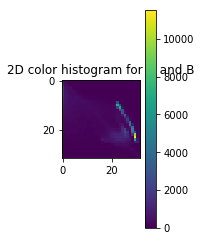

In [30]:
#2D histogram

fig = plt.figure()

#plot  a 2D color histogram for green and blue;
ax = fig.add_subplot(131)
hist = cv2.calcHist([chans[1], chans[0]], [0, 1], None, [32, 32], [0, 256, 0, 256])
p =ax.imshow(hist, interpolation='nearest')
ax.set_title("2D color histogram for G and B")
plt.colorbar(p)



3D histogram shape: (8, 8, 8), with 512 values


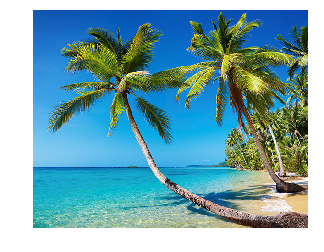

In [41]:
hist = cv2.calcHist([image], [0, 1, 2],None, [8, 8, 8], [0, 256, 0, 256, 0, 256])
print("3D histogram shape: {}, with {} values".format(hist.shape, hist.flatten().shape[0]))
 
# display the image with matplotlib to avoid GUI conflicts on macOS
plt.figure()
plt.axis("off")
plt.imshow(imutils.opencv2matplotlib(image))
 
# show our plots
plt.show()

## Histogram Equalization<br>
improves the contrast of an image by 'stretching' the distribution of pixels. <br>
Usage: when an image contains foregrounds and backgrounds that are dark or both light.<br>
useful when enhancing the contrast of medical or satellite images. <br>


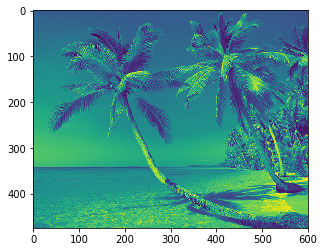

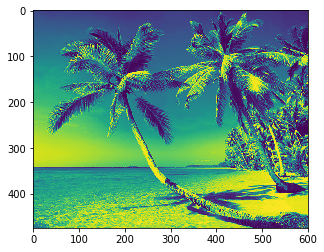

In [44]:
image = cv2.imread(file)
image = cv2.cvtColor( image, cv2.COLOR_BGR2GRAY )

#apply histogram equalization to stretch the contrast of image
eq = cv2.equalizeHist(image)

plt.imshow(image)
plt.figure()
plt.imshow(eq)

## Histogram and Masks <br>


In [7]:
def plot_histogram(image, mask=None):
	# grab the image channels, initialize the tuple of colors and
     # the figure
    
    image=cv2.imread(file)
    chans = cv2.split(image)
    colors = ("b", "g", "r")
    plt.figure()
    plt.title("Histogram for original")
    plt.xlabel("Bins")
    plt.ylabel("# of Pixels")

    # loop over the image channels
    for (chan, color) in zip(chans, colors):
        # create a histogram for the current channel and plot it
        hist = cv2.calcHist([chan], [0], mask, [256], [0, 256])
        plt.plot(hist, color=color)
        plt.xlim([0, 256])

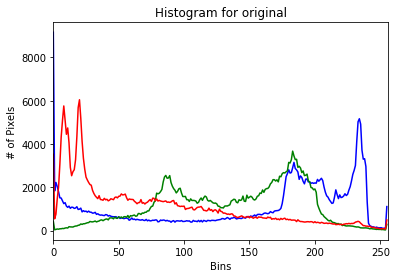

In [8]:
plot_histogram( file)

## histogram with mask

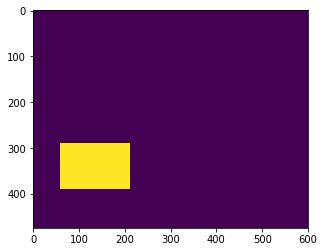

In [3]:
mask = np.zeros(image.shape[:2], dtype='uint8')
cv2.rectangle(mask, (60,290), (210,390), 255, -1 )
plt.imshow(mask)

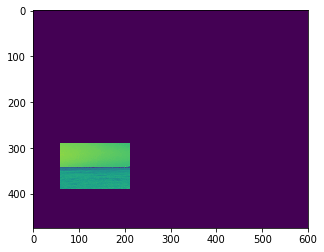

In [4]:
# how mask look like ?
masked = cv2.bitwise_and(image, image, mask=mask)
plt.imshow(masked) # can

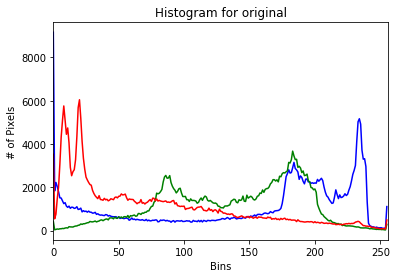

In [10]:
plot_histogram(image) # this is for masked image